In [499]:
# import the python libraries  

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('housing.csv', header = None)

df.shape

(506, 14)

In [500]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [501]:
# Add column headers to the dataset

df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
           'RAD','TAX','PTRATIO' ,'B','LSTAT','MEDV' ]


In [502]:
# Review Dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [503]:
#Analyze Dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [504]:
# Check for any missing values

df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

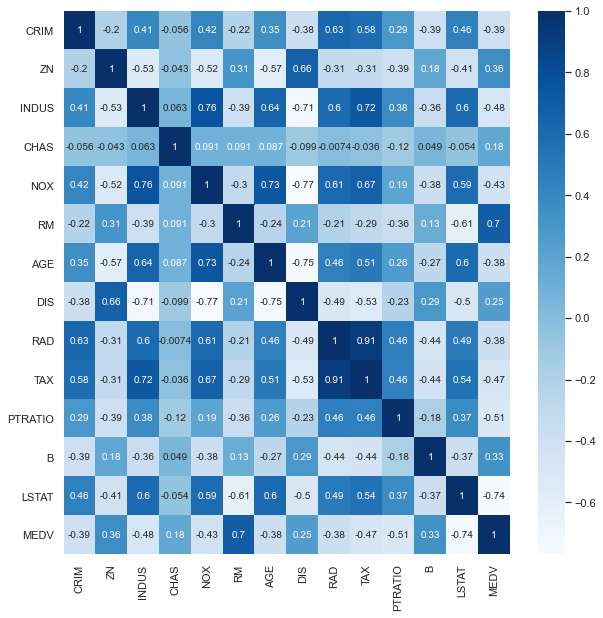

In [505]:
# Feature Selection
# Find the high correlated features

%matplotlib inline
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)

plt.show()

In [506]:
# The high correlated features are "LSTAT","PTRATIO","RM"

corr_MEDV = abs(cor["MEDV"]).sort_values(ascending=False)
print(corr_MEDV)

relevant_features = corr_MEDV[corr_MEDV>0.5]
relevant_features



MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64


MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
Name: MEDV, dtype: float64

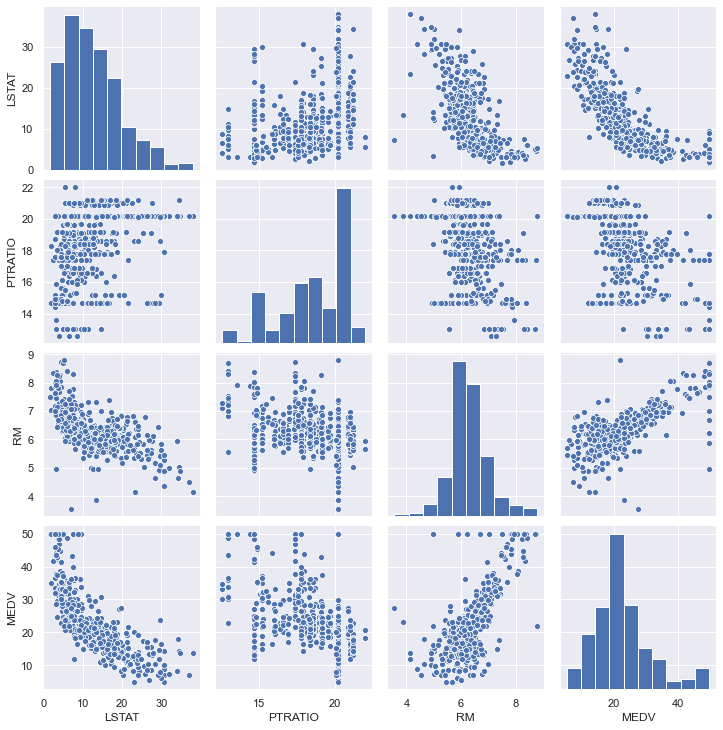

In [507]:
# Plot correlated features visual

a = sns.pairplot(df[["LSTAT","PTRATIO","RM","MEDV"]])


In [508]:
print(df[["LSTAT","PTRATIO"]].corr())
print(df[["RM","LSTAT"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000
             RM     LSTAT
RM     1.000000 -0.613808
LSTAT -0.613808  1.000000


In [509]:
# Converted LSTAT to np.log to fit the majority of the data points

df["LOGLSTAT"] = df["LSTAT"].apply(np.log)

df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,LOGLSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1.605430
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,2.212660
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1.393766
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1.078410
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1.673351


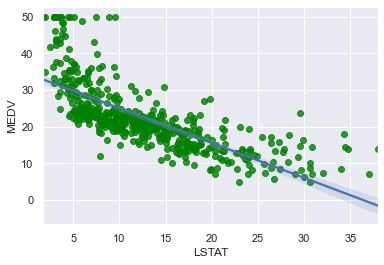

In [510]:
# Plot LSTAT

sns.regplot(x = 'LSTAT' , y = 'MEDV' ,data = df, scatter_kws = {'color': 'green'})



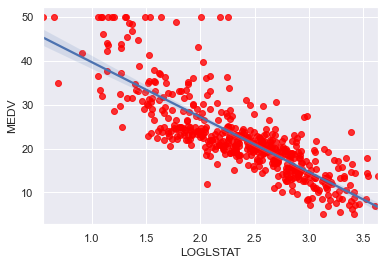

In [511]:
# Plot LOGLSTAT
sns.regplot(x = 'LOGLSTAT' , y = 'MEDV' ,data = df, scatter_kws = {'color': 'red'})

In [324]:
X = df[["RM","LOGLSTAT",'PTRATIO']].values

y = df["MEDV"].values


In [468]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = .33, random_state = 30)

In [469]:
from sklearn.linear_model import LinearRegression

lregression = LinearRegression()

lregression.fit(x_train, y_train)

LinearRegression()

In [470]:
print(lregression.coef_)

print(lregression.intercept_)

[ 3.89148537 -7.92916607 -0.90332034]
33.322885792312505


In [471]:
y_pred = lregression.predict(x_test)

y_pred.shape

(167,)

In [528]:
from sklearn.metrics import r2_score

print("Accuracy Score:",r2_score(y_test,y_pred).astype(str))

Accuracy Score: 0.7277773744367226


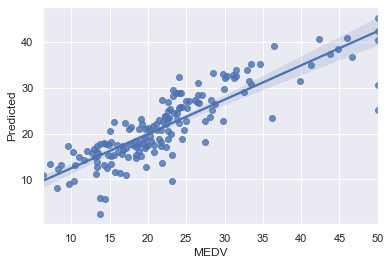

In [529]:
#Plot the Actual Values vs Predicted Values

import matplotlib.pyplot as plt

sns.regplot(data=prd_y_df, x = "MEDV", y = 'Predicted')